In [29]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv(r"
               .csv")

print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
df.duplicated().sum()

1

In [10]:
for c in df.columns:
    print(f"Total number of null values in column {c} : {df[c].isnull().sum()}")

Total number of null values in column age : 0
Total number of null values in column sex : 0
Total number of null values in column bmi : 0
Total number of null values in column children : 0
Total number of null values in column smoker : 0
Total number of null values in column region : 0
Total number of null values in column charges : 0


In [25]:
df.drop_duplicates(inplace=True)
df

,age,sex,bmi,children,smoker,region,charges,age group
0,19,female,27.900,0,yes,southwest,16884.92400,18-30
1,18,male,33.770,1,no,southeast,1725.55230,18-30
2,28,male,33.000,3,no,southeast,4449.46200,18-30
3,33,male,22.705,0,no,northwest,21984.47061,31-40
4,32,male,28.880,0,no,northwest,3866.85520,31-40
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,31-40
1334,18,female,31.920,0,no,northeast,2205.98080,18-30
1335,18,female,36.850,0,no,southeast,1629.83350,18-30
1336,21,female,25.800,0,no,southwest,2007.94500,18-30


In [12]:
df.age.min()

18

In [13]:
df.age.max()

64

In [31]:
def age_group(age_list):
    new_list=[]
    for age in age_list:
        if(age<=30):
            new_list.append("18-30")
        elif(age<=40):
            new_list.append("31-40")
        elif(age<=50):
            new_list.append("41-50")
        elif(age<=60):
            new_list.append("51-60")
        else:
            new_list.append("60-above")
    return new_list



In [32]:
#call function
df["age group"]=age_group(df.age)
print(df)

      age     sex     bmi  children smoker     region      charges age group
0      19  female  27.900         0    yes  southwest  16884.92400     18-30
1      18    male  33.770         1     no  southeast   1725.55230     18-30
2      28    male  33.000         3     no  southeast   4449.46200     18-30
3      33    male  22.705         0     no  northwest  21984.47061     31-40
4      32    male  28.880         0     no  northwest   3866.85520     31-40
...   ...     ...     ...       ...    ...        ...          ...       ...
1333   50    male  30.970         3     no  northwest  10600.54830     41-50
1334   18  female  31.920         0     no  northeast   2205.98080     18-30
1335   18  female  36.850         0     no  southeast   1629.83350     18-30
1336   21  female  25.800         0     no  southwest   2007.94500     18-30
1337   61  female  29.070         0    yes  northwest  29141.36030  60-above

[1337 rows x 8 columns]


In [26]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [27]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [46]:
def bmi_status(bmi_list):
    new_bmi_list=[]
    for bmi in bmi_list:
        if(bmi<18.5):
            new_bmi_list.append("Underweight")
        elif((bmi>=18.5) & (bmi<=24.9)):
            new_bmi_list.append("Normal")
        elif((bmi>=25) & (bmi<=29.9)):
            new_bmi_list.append("Overweight")
        else:
            new_bmi_list.append("Obesity")
    return new_bmi_list
df["BMI Status"]=bmi_status(df.bmi)
df

,age,sex,bmi,children,smoker,region,charges,age group,BMI Status
0,19,female,27.900,0,yes,southwest,16884.92400,18-30,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,18-30,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,18-30,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,31-40,Normal
4,32,male,28.880,0,no,northwest,3866.85520,31-40,Overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,41-50,Obesity
1334,18,female,31.920,0,no,northeast,2205.98080,18-30,Obesity
1335,18,female,36.850,0,no,southeast,1629.83350,18-30,Obesity
1336,21,female,25.800,0,no,southwest,2007.94500,18-30,Overweight


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1337 non-null   int64  
 1   sex        1337 non-null   object 
 2   bmi        1337 non-null   float64
 3   children   1337 non-null   int64  
 4   smoker     1337 non-null   object 
 5   region     1337 non-null   object 
 6   charges    1337 non-null   float64
 7   age group  1337 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 94.0+ KB


# Data Visulization

<Axes: xlabel='age group', ylabel='count'>

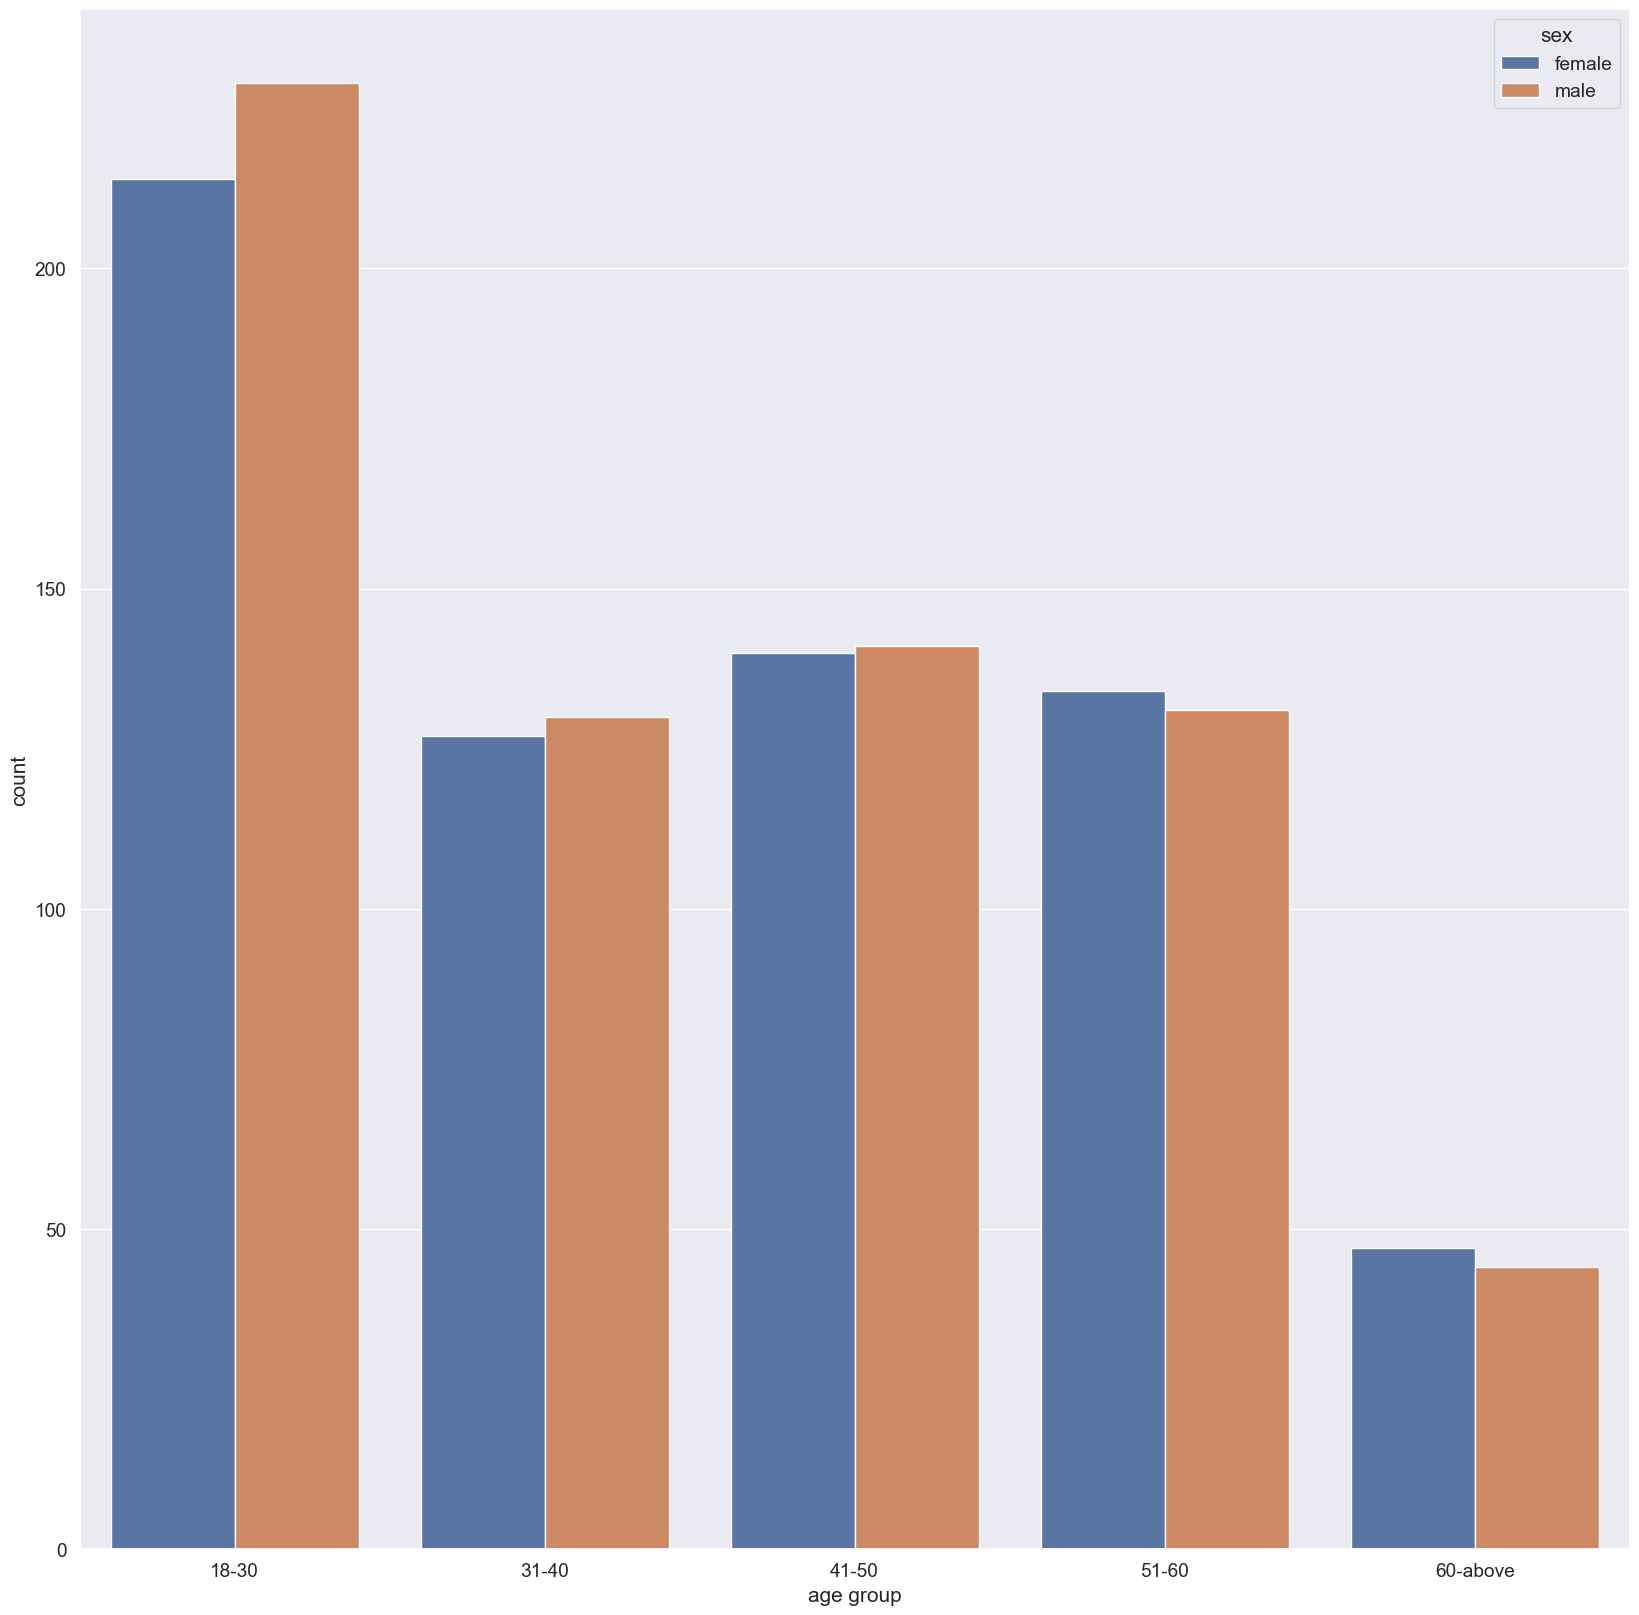

In [135]:
sea.set(font_scale=1.25)
sea.countplot(x=df["age group"], hue=df["sex"])


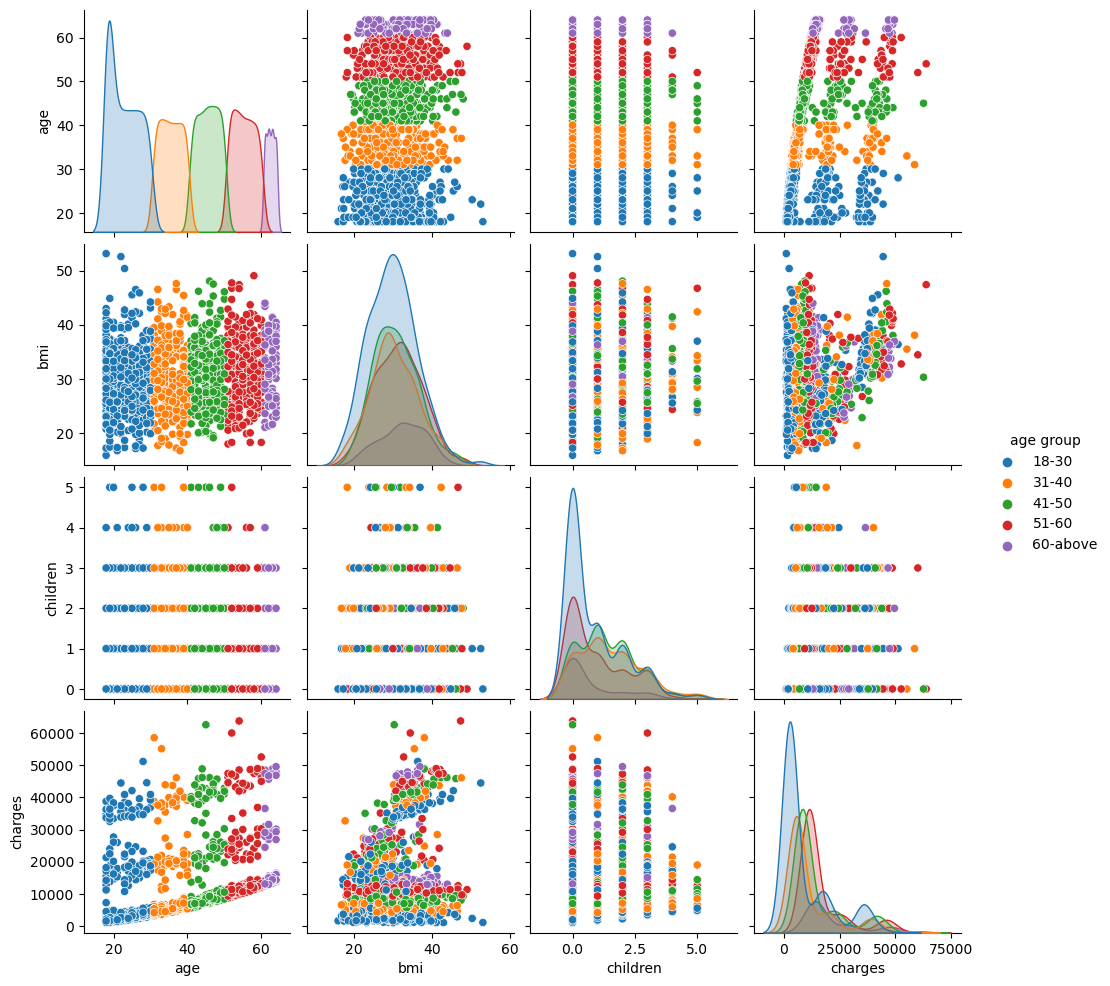

In [63]:
#

sea.pairplot(df,hue="age group")

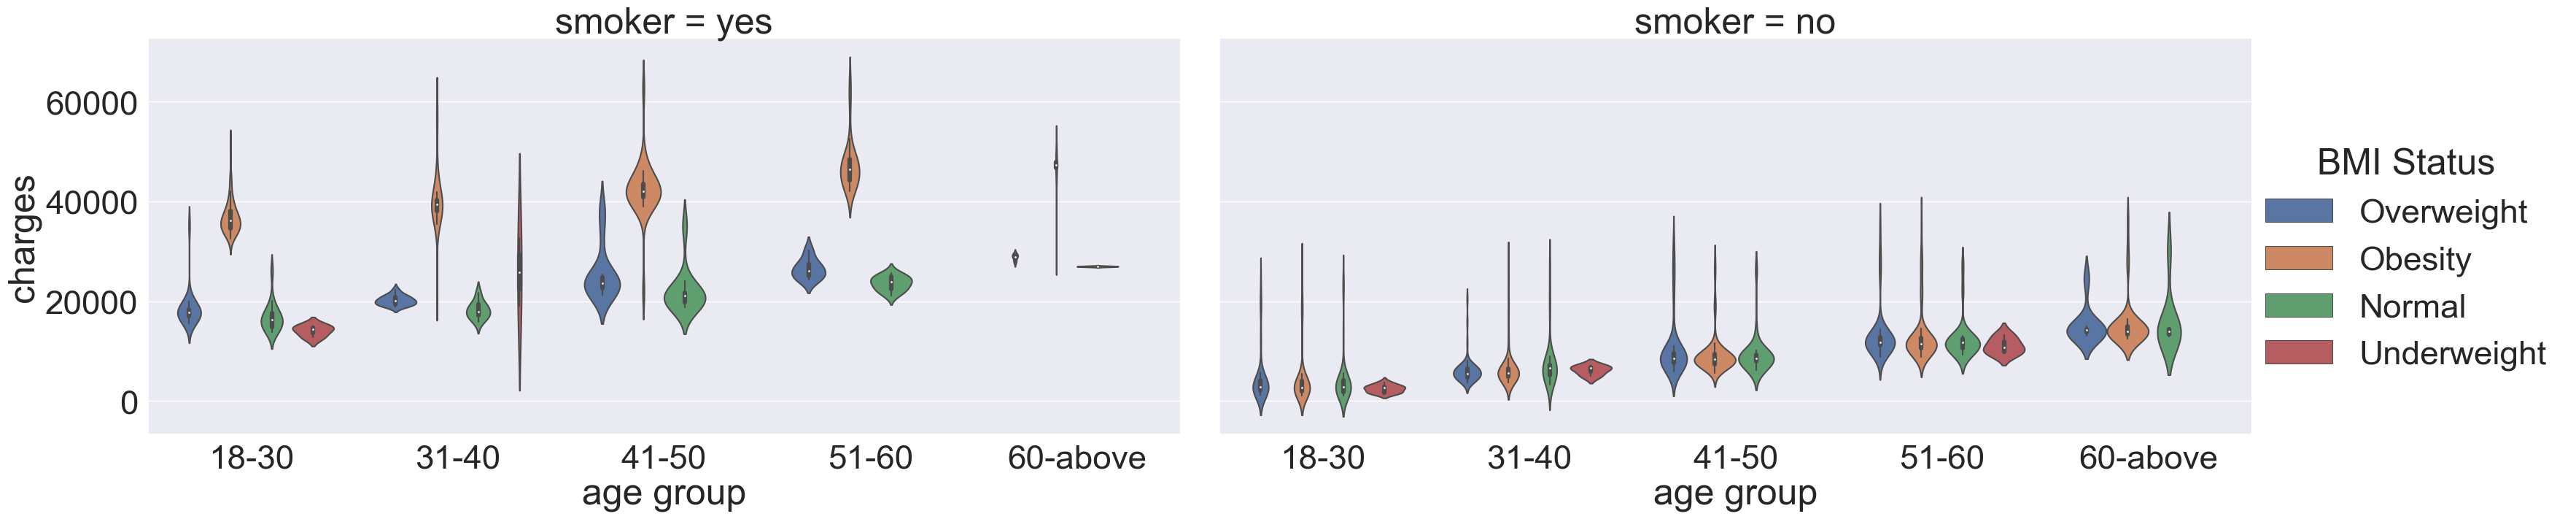

In [114]:

sea.catplot(data=df,x="age group",y="charges",hue="BMI Status",col="smoker", kind="violin",height=8,aspect=2)
sea.set(font_scale=3)


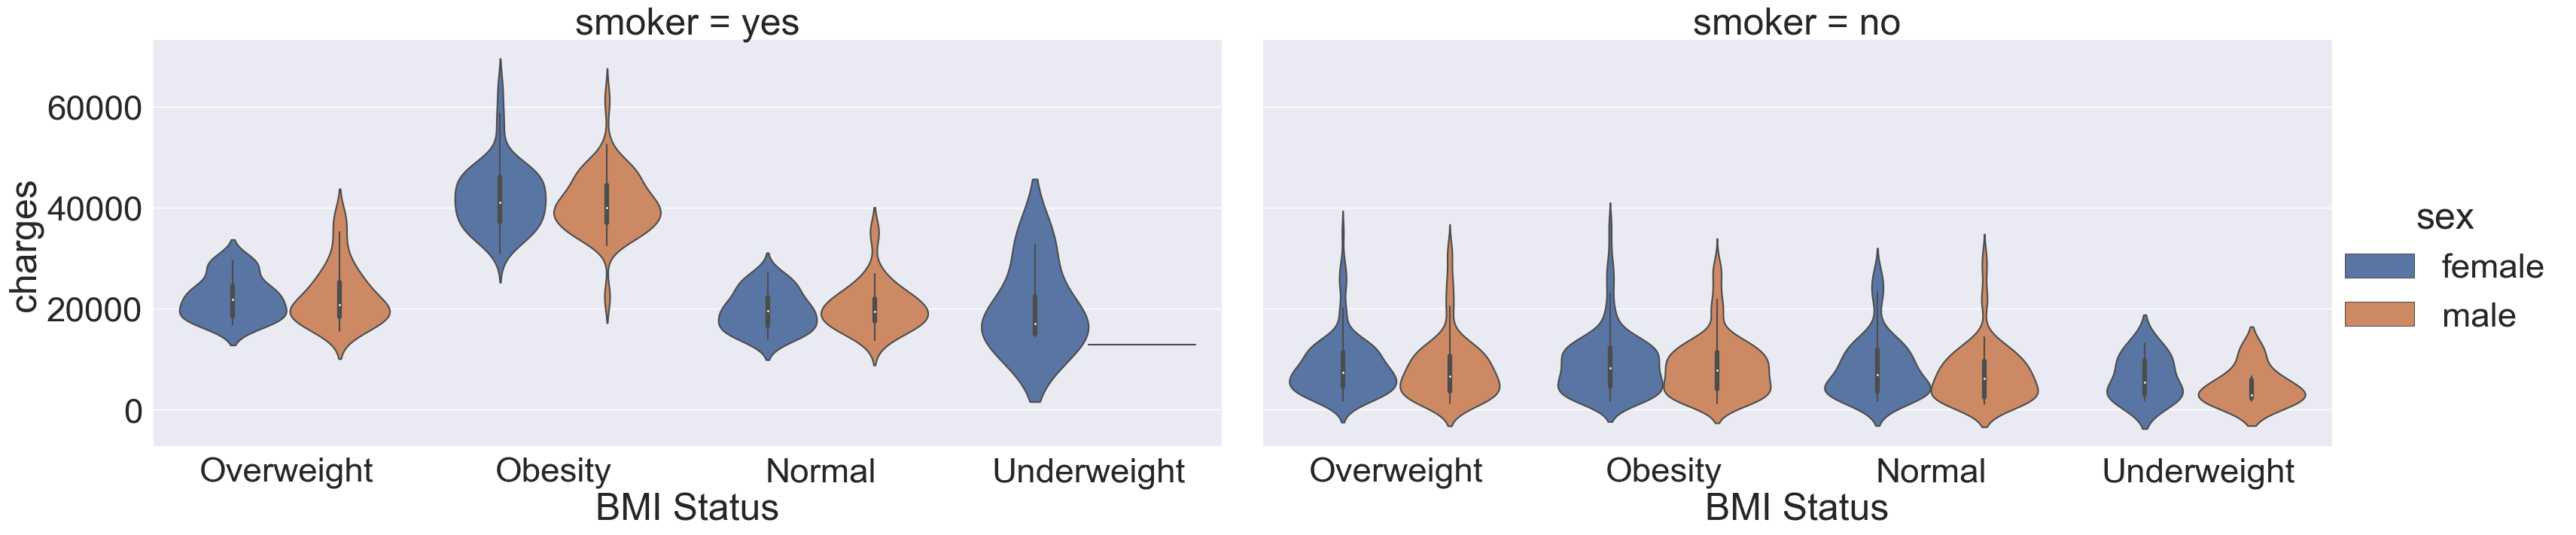

In [117]:
sea.catplot(data=df,x="BMI Status",y="charges",hue="sex",col="smoker", kind="violin",height=8,aspect=2)
sea.set(font_scale=3)


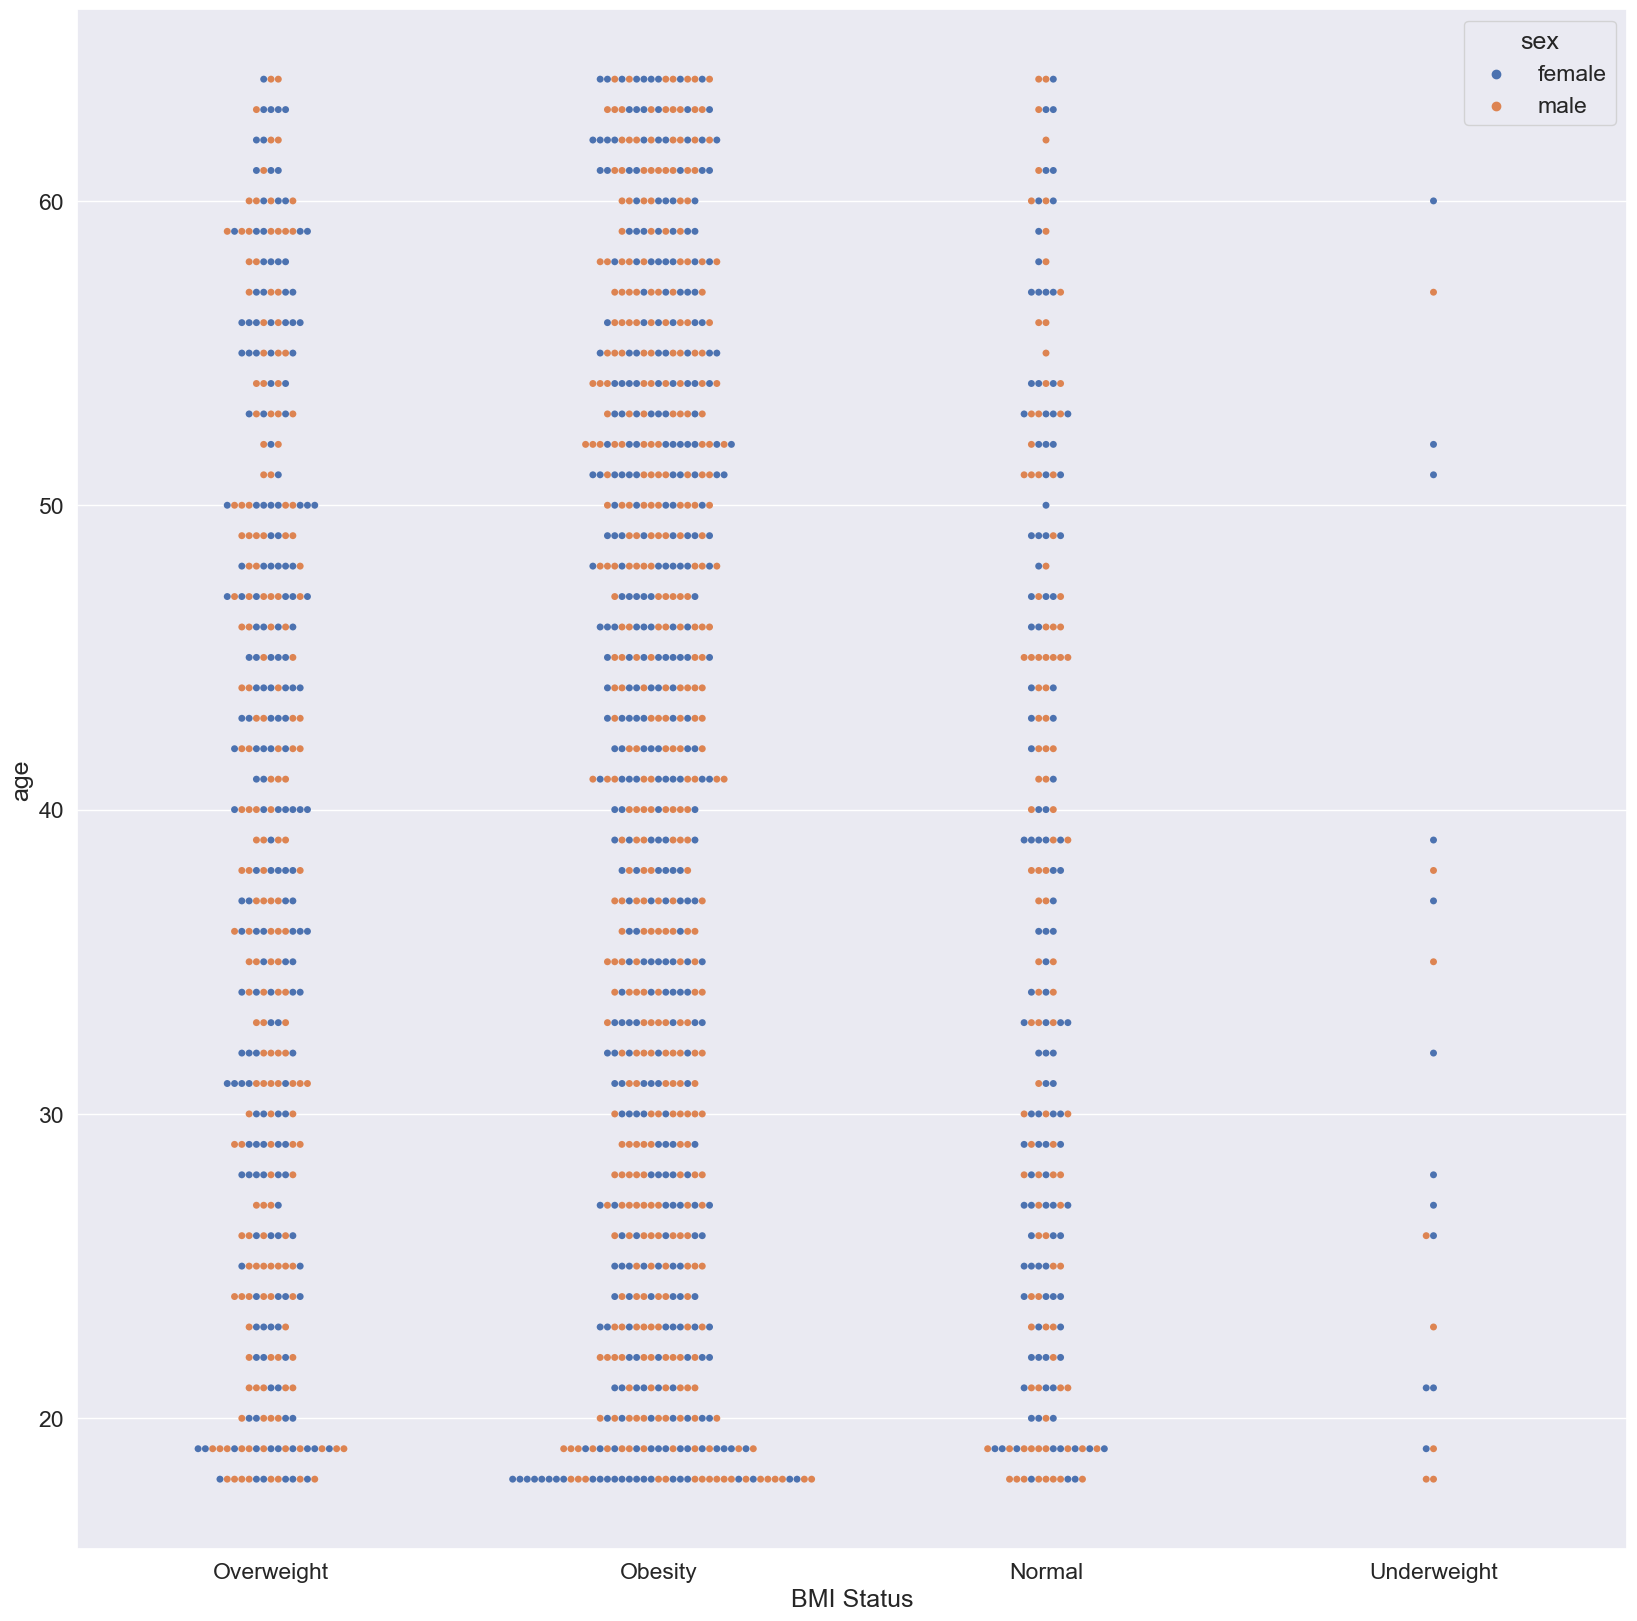

In [139]:
sea.swarmplot(df,y="age", x="BMI Status",hue="sex")
sea.set(font_scale=1.5)


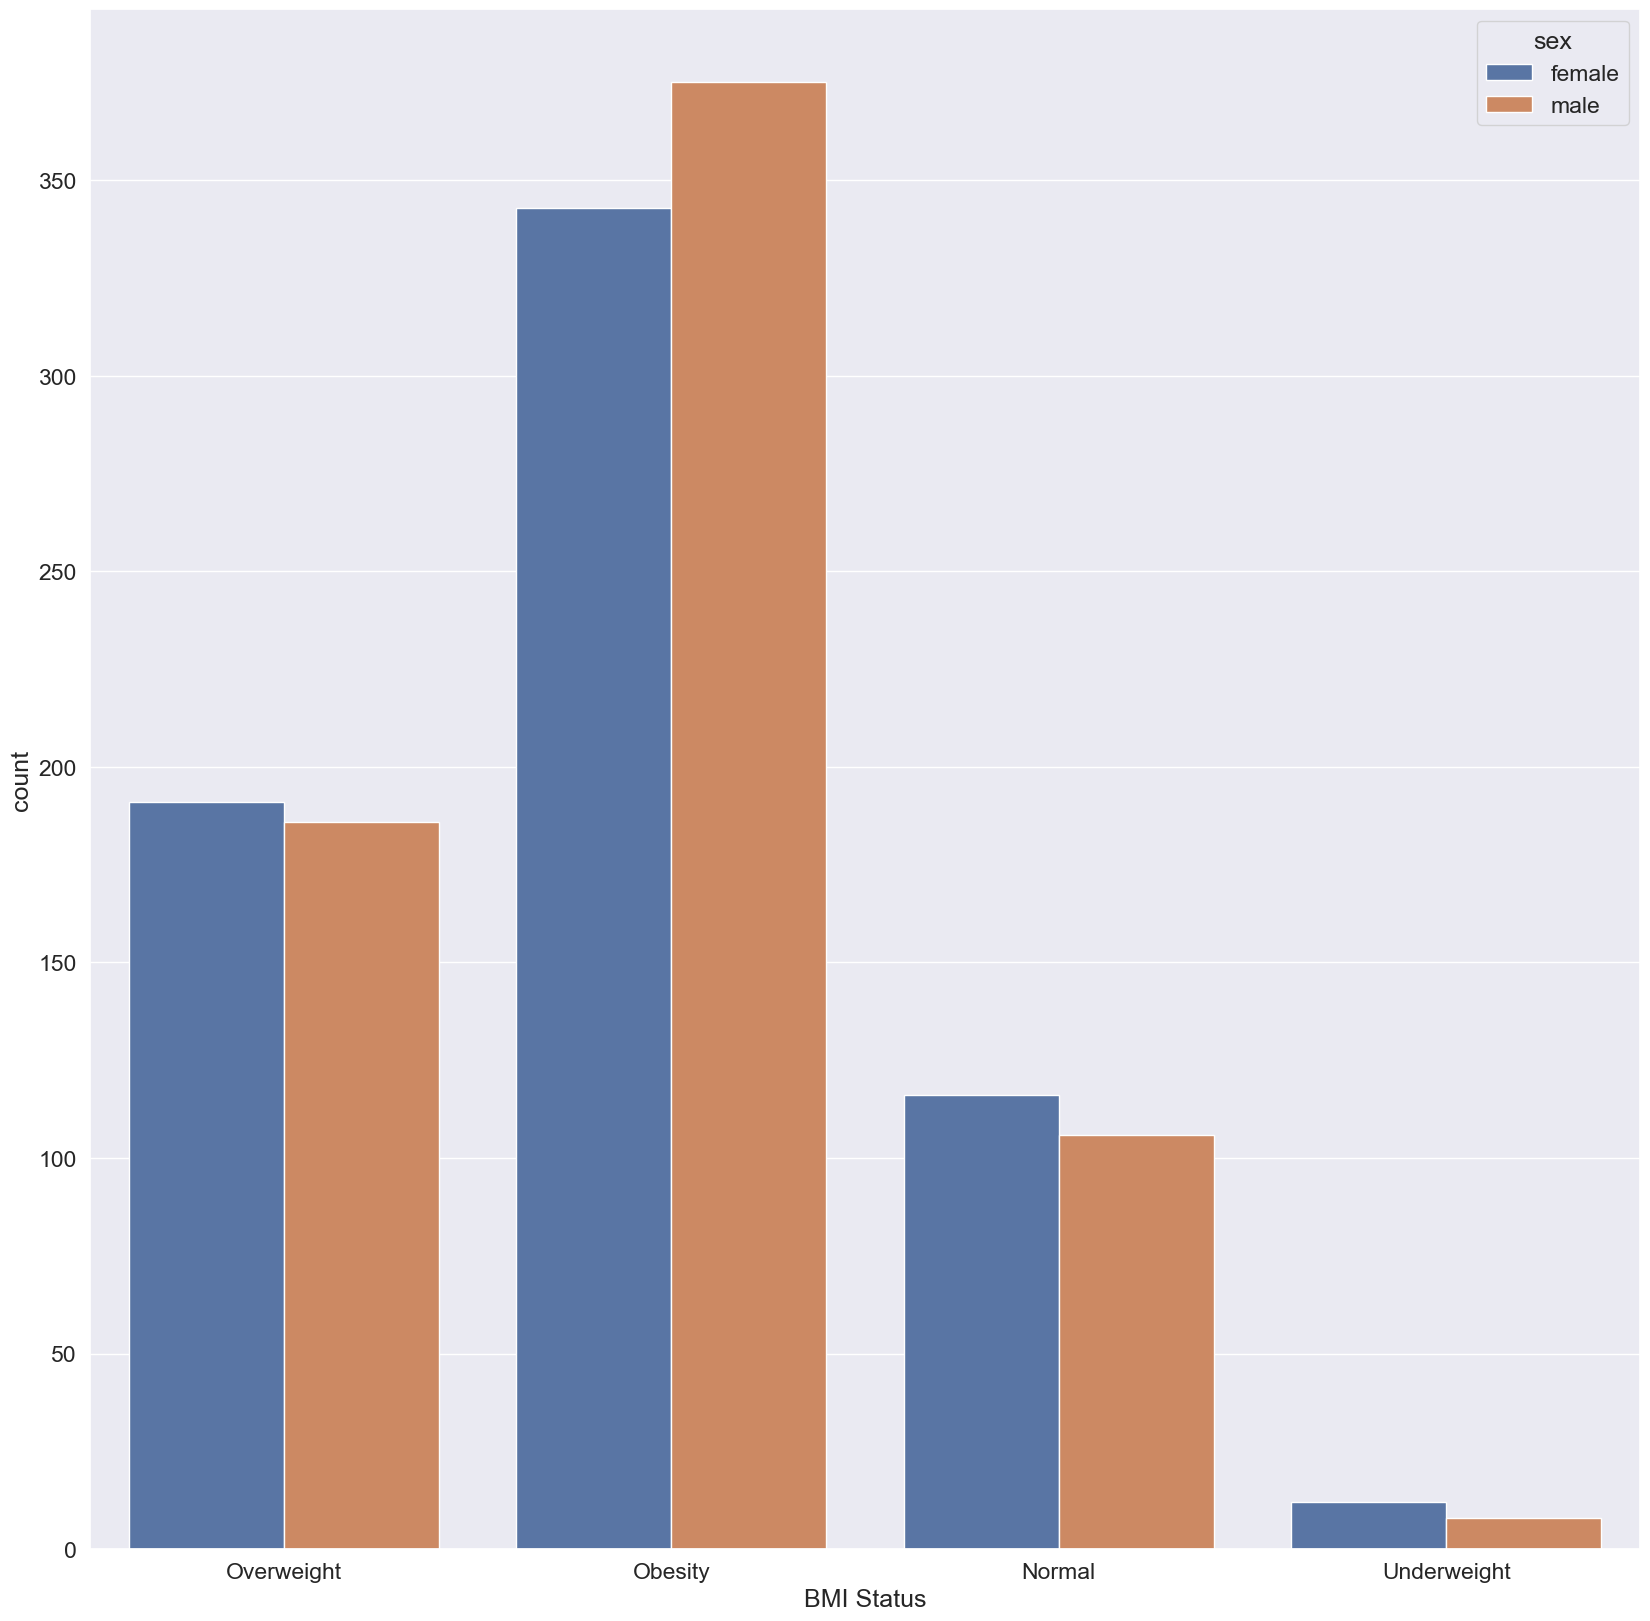

In [138]:
sea.countplot(df,hue="sex", x="BMI Status")
sea.set(font_scale=1.5)

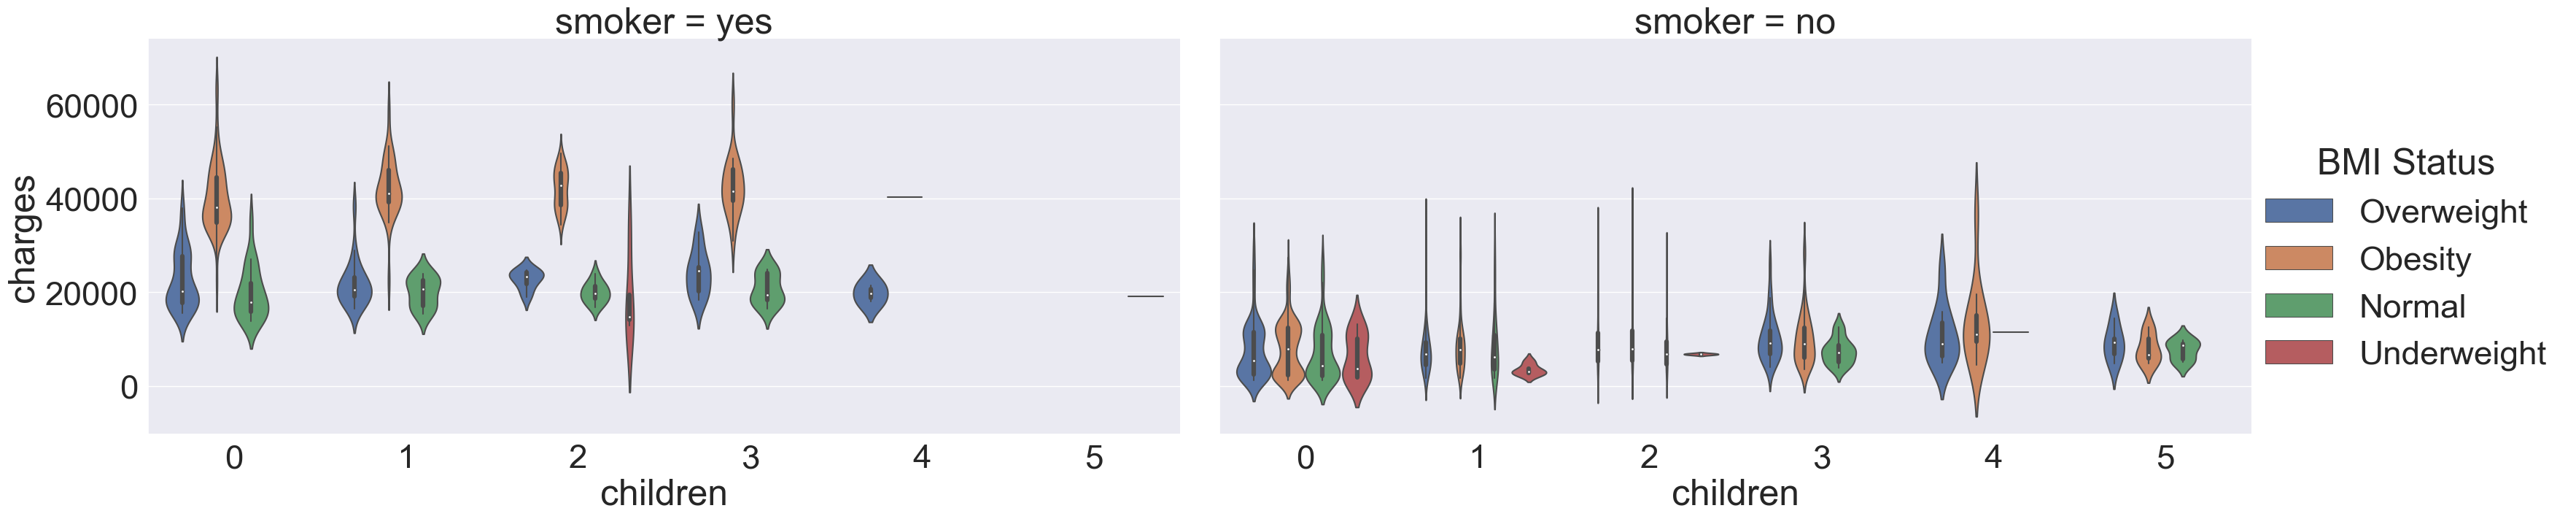

In [131]:
#ea.scatterplot(df,x="",y="charges", hue="BMI Status",style="smoker")
sea.catplot(data=df,x="children",y="charges",hue="BMI Status",col="smoker", kind="violin",height=8,aspect=2)
sea.set(font_scale=2)